In [32]:
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import numpy as np 

In [22]:
data = pd.read_csv('../data/data_preprocessed.csv')
traits = data.select_dtypes(include='int64')

In [23]:
scaler = StandardScaler()
scaler.fit(traits)
traits_scaled = scaler.transform(traits)
scaled_traits = pd.DataFrame(data=traits_scaled, columns=traits.columns)

In [36]:
pca = PCA(n_components=10)
pca.fit_transform(scaled_traits)

array([[ 0.35614838,  1.75370878, -0.78961639, ..., -0.04373486,
         0.24377897, -0.18954839],
       [ 2.32792951,  0.91264444, -2.64839591, ...,  1.91933946,
        -1.53202117,  0.0389612 ],
       [-1.1991216 ,  3.81089702,  1.64734094, ..., -1.18081029,
        -0.38559463, -0.94313399],
       ...,
       [-1.30276311, -0.3509264 , -1.00176057, ..., -0.78110367,
         0.26855425,  0.78988514],
       [-0.83255181, -1.62461784,  2.32314833, ..., -0.96386079,
         1.20941622,  1.09989739],
       [-1.97142195, -0.7455125 , -0.11798252, ...,  0.33494929,
        -1.52951794, -1.42378086]])

In [37]:
ev_ratio = pca.explained_variance_ratio_

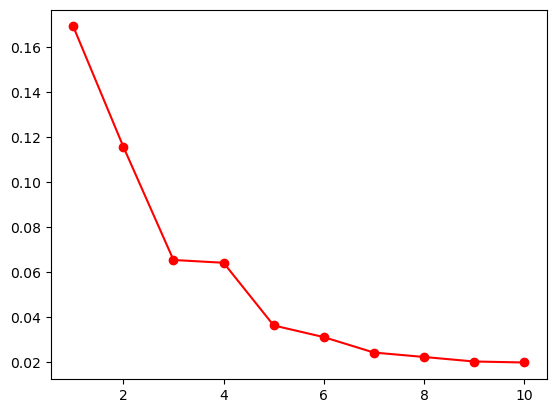

In [38]:
PC_numbers = np.arange(pca.n_components_) + 1

plt.plot(PC_numbers, ev_ratio, 'ro-')

In [49]:
pca = PCA(n_components=5)
pc = pca.fit_transform(scaled_traits)

In [50]:
pd.DataFrame(data=pc)

,0,1,2,3,4
0,0.356148,1.753709,-0.789616,1.337115,-0.065504
1,2.327930,0.912644,-2.648396,0.355100,3.137846
2,-1.199122,3.810897,1.647341,0.524121,-0.928461
3,5.729255,-0.032554,1.048943,-6.127567,-1.704062
4,-4.967796,-0.657613,-0.732245,-0.876560,0.149787
...,...,...,...,...,...
2759,-0.675241,0.233009,1.441633,-2.316780,-1.236099
2760,-1.835254,-0.015800,-4.038067,-4.490047,2.789504
2761,-1.302763,-0.350926,-1.001761,2.157358,-1.613903
2762,-0.832552,-1.624618,2.323148,-2.745373,-0.546322


In [51]:
def biplot(score,coef,labels=None):
 
    xs = score[:,0]
    ys = score[:,1]
    n = coef.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,
                s=5, 
                color='orange')
 
    for i in range(n):
        plt.arrow(0, 0, coef[i,0], 
                  coef[i,1],color = 'purple',
                  alpha = 0.5)
        plt.text(coef[i,0]* 1.15, 
                 coef[i,1] * 1.15, 
                 labels[i], 
                 color = 'darkblue', 
                 ha = 'center', 
                 va = 'center')
 
    plt.xlabel("pc{}".format(1))
    plt.ylabel("pc{}".format(2))    
 
 
    plt.figure()

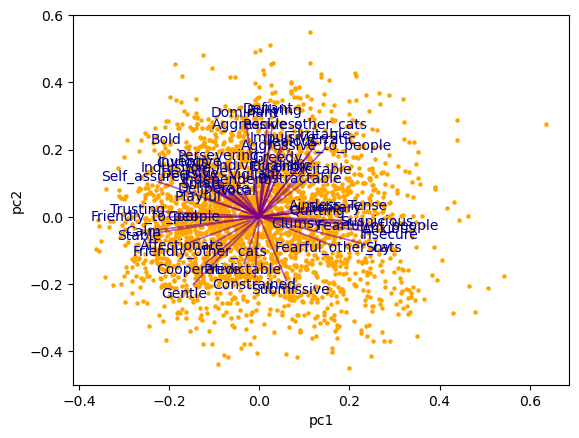

<Figure size 640x480 with 0 Axes>

In [52]:
biplot(pc, np.transpose(pca.components_), list(scaled_traits.columns))

In [54]:
component_weights = pca.components_

In [59]:
feature_weights_mapping = {}
for i, component in enumerate(component_weights):
    component_feature_weights = zip(scaled_traits.columns, component)
    feature_weights_mapping[f"Component {i+1}"] = sorted(component_feature_weights, key=lambda x: abs(x[1]), reverse=True)


In [60]:
for feature, weight in feature_weights_mapping["Component 1"]:
    print(f"{feature}: {weight}")
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

Anxious: 0.2513699848859127
Insecure: 0.25051620267273256
Trusting: -0.2344970267811931
Stable: -0.23156978650163934
Shy: 0.22970881357107456
Fearful_of_people: 0.22845394974950847
Suspicious: 0.22618789638585732
Calm: -0.22441105132580447
Self_assured: -0.22104726419397305
Tense: 0.20900858963272145
Friendly_to_people: -0.20076972539466315
Bold: -0.1793187141568403
Inquisitive: -0.15977836878015186
Fearful_other_cats: 0.1536254912599785
Affectionate: -0.14884819784485745
Curious: -0.14774266201342134
Cool: -0.14773766098276725
Solitary: 0.14595562649034963
Gentle: -0.14415573986268065
Erratic: 0.14396595724600092
Inventive: -0.13418319039381688
Decisive: -0.1329328526024668
Irritable: 0.12474661120197092
Playful: -0.11796571490287854
Excitable: 0.11768351235188279
Cooperative: -0.11719677679322706
Friendly_other_cats: -0.11506541976571909
Smart: -0.11261739425376663
Quitting: 0.11137394116018863
Aggressive_to_people: 0.10966038264545859
Aimless: 0.1094271395037329
Active: -0.099311527